In [1171]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [1172]:
train=pd.read_csv('train.csv',index_col='PassengerId')
test=pd.read_csv('test.csv',index_col='PassengerId')

In [1173]:
train_length=train.shape[0]

In [1174]:
test_length=test.shape[0]

In [1175]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1176]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1177]:
cleanup_nums={'Sex':{'male':1,'female':0},'Embarked':{'C':0, 'Q':1, 'S':2}}

In [1178]:
train.replace(cleanup_nums, inplace=True)
test.replace(cleanup_nums, inplace=True)

In [1179]:
train=train.drop(['Name','Ticket','Cabin'],axis=1)
test=test.drop(['Name','Ticket','Cabin'],axis=1)

In [1180]:
train['Age']=train['Age'].fillna(np.mean(train['Age']))
test['Age']=test['Age'].fillna(np.mean(test['Age']))

In [1181]:
test['Fare']=test['Fare'].fillna(np.mean(test['Fare']))

In [1182]:
train['Embarked']=train['Embarked'].ffill().bfill()
test['Embarked']=test['Embarked'].ffill().bfill()

In [1183]:
train.loc[train['Age']>60,'Age']=np.mean(train['Age'])
train.loc[train['Age']<3,'Age']=np.percentile(train['Age'],[25])

In [1184]:
test.columns[test.isna().any()].tolist()

[]

{'boxes': [<matplotlib.lines.Line2D at 0x1fbf17f5b70>],
 'caps': [<matplotlib.lines.Line2D at 0x1fbf17fe6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf1806438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf17fef98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1fbf17f5cf8>,
  <matplotlib.lines.Line2D at 0x1fbf17fe278>]}

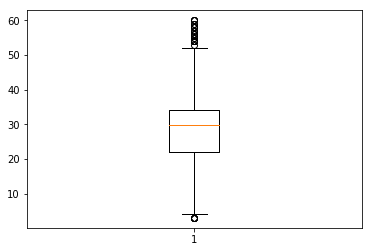

In [1185]:
plt.boxplot(train['Age'])

In [1186]:
train.loc[train['Fare']>80,'Fare']=np.mean(train['Fare'])

{'boxes': [<matplotlib.lines.Line2D at 0x1fbf1857940>],
 'caps': [<matplotlib.lines.Line2D at 0x1fbf18604a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf1868208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf1860d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1fbf1857ac8>,
  <matplotlib.lines.Line2D at 0x1fbf1860048>]}

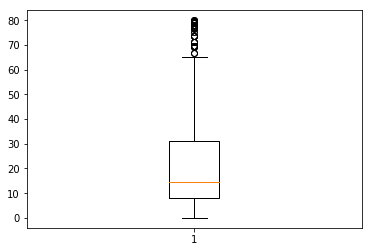

In [1187]:
plt.boxplot(train['Fare'])

In [1188]:
x_train=train.drop('Survived',axis=1)

In [1189]:
y_train=train['Survived']

In [1190]:
females=test.loc[test['Sex']==0,'Sex'].count()
females

152

In [1191]:
males=test.loc[test['Sex']==1,'Sex'].count()
males

266

In [1192]:
from sklearn.tree import DecisionTreeClassifier

In [1193]:
logreg=DecisionTreeClassifier(min_samples_split=80,splitter='random')

In [1194]:
logreg.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [1195]:
logreg.score(x_train,y_train)

0.80920314253647585

In [1196]:
pre=logreg.predict(test)

In [1197]:
test['Survived']=pre

In [1198]:
result={'PassengerId':test.index,'Survived':pre}
output=pd.DataFrame(result)

In [1199]:
output['Survived'].value_counts()

0    292
1    126
Name: Survived, dtype: int64

In [1200]:
output.to_csv('submission.csv',index=False)

In [1201]:
test=test.loc[test['Survived']>0,:]

In [1202]:
test['Sex'].value_counts()

0    124
1      2
Name: Sex, dtype: int64

In [1203]:
survive=test['Sex'].count()

In [1204]:
survival_rate=(survive/test_length)
survival_rate

0.30143540669856461

In [1205]:
survive_female=test.loc[test['Sex']==0,'Sex'].count()
survive_male=test.loc[test['Sex']==1,'Sex'].count()

In [1206]:
survival_rate_female=survive_female/females
survival_rate_female

0.81578947368421051

In [1207]:
survival_rate_man=survive_male/males
survival_rate_man

0.0075187969924812026